In [1]:
# Check if a GPU is available
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if device.type == 'cuda':
    print(f"Using GPU: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found, using CPU.")

Using GPU: NVIDIA GeForce RTX 4060 Laptop GPU


In [2]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms

# Other necessary imports
import numpy as np
import matplotlib.pyplot as plt

In [9]:
from collections import Counter
import numpy as np
import torch
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from torchvision import transforms, datasets

# Define image transformations (Rescale and normalization)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Using ImageNet stats for normalization
])

# Load the dataset
data_dir = 'C:/Users/Leon/Desktop/SJSU/255/Plant_leave_diseases_dataset_without_augmentation/Plant_leave_diseases_dataset_without_augmentation'
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training, validation, and testing sets
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size

train_dataset, val_dataset, test_dataset = random_split(full_dataset, [train_size, val_size, test_size])

# Calculate class distribution within the training set
train_targets = [label for _, label in train_dataset]
class_counts = Counter(train_targets)  # Count occurrences of each class in the training set
class_weights = {cls: 1.0 / count for cls, count in class_counts.items()}  # Inverse frequency as weights
sample_weights = [class_weights[label] for _, label in train_dataset]  # Assign a weight to each training sample

# Create a WeightedRandomSampler for the training dataset
sampler = WeightedRandomSampler(weights=sample_weights, num_samples=len(train_dataset), replacement=True)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=sampler)  # Balanced training loader
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)  # Validation loader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # Testing loader

# Print dataset statistics for sanity check
print("Training set size:", len(train_dataset))
print("Validation set size:", len(val_dataset))
print("Test set size:", len(test_dataset))
print("Class distribution in training set:", class_counts)


Training set size: 16360
Validation set size: 2045
Test set size: 2046
Class distribution in training set: Counter({16: 3839, 3: 1355, 5: 1191, 13: 1087, 9: 953, 11: 950, 12: 947, 4: 916, 14: 863, 6: 834, 10: 774, 7: 673, 1: 500, 0: 495, 8: 420, 15: 341, 2: 222})



Training ResNet18...
Epoch 1/10 - Train Loss: 0.2673 - Train Acc: 0.9169 - Val Loss: 0.0961 - Val Acc: 0.9643
Epoch 2/10 - Train Loss: 0.1040 - Train Acc: 0.9687 - Val Loss: 0.0834 - Val Acc: 0.9736
Epoch 3/10 - Train Loss: 0.0902 - Train Acc: 0.9708 - Val Loss: 0.1450 - Val Acc: 0.9511
Epoch 4/10 - Train Loss: 0.0751 - Train Acc: 0.9772 - Val Loss: 0.0451 - Val Acc: 0.9829
Epoch 5/10 - Train Loss: 0.0513 - Train Acc: 0.9842 - Val Loss: 0.0397 - Val Acc: 0.9839
Epoch 6/10 - Train Loss: 0.0474 - Train Acc: 0.9864 - Val Loss: 0.2125 - Val Acc: 0.9452
Epoch 7/10 - Train Loss: 0.0559 - Train Acc: 0.9836 - Val Loss: 0.0744 - Val Acc: 0.9780
Epoch 8/10 - Train Loss: 0.0462 - Train Acc: 0.9870 - Val Loss: 0.1241 - Val Acc: 0.9643
Early stopping...
Best Validation Accuracy for ResNet18: 0.9839
Evaluating ResNet18 on test dataset...
Test Accuracy for ResNet18: 0.9580


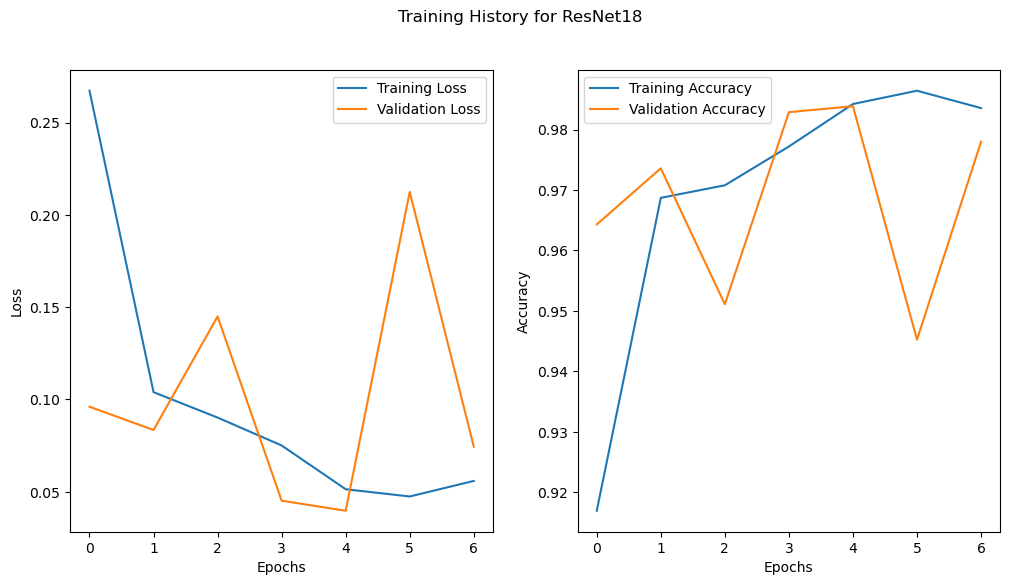


Training VGG16...
Epoch 1/10 - Train Loss: 1.5772 - Train Acc: 0.4700 - Val Loss: 0.6526 - Val Acc: 0.7751
Epoch 2/10 - Train Loss: 0.6387 - Train Acc: 0.7789 - Val Loss: 0.4615 - Val Acc: 0.8479
Epoch 3/10 - Train Loss: 0.4524 - Train Acc: 0.8512 - Val Loss: 0.4805 - Val Acc: 0.8509
Epoch 4/10 - Train Loss: 0.4487 - Train Acc: 0.8532 - Val Loss: 0.4661 - Val Acc: 0.8518
Epoch 5/10 - Train Loss: 0.3360 - Train Acc: 0.8879 - Val Loss: 0.3714 - Val Acc: 0.8851
Epoch 6/10 - Train Loss: 0.4248 - Train Acc: 0.8646 - Val Loss: 0.3331 - Val Acc: 0.8900
Epoch 7/10 - Train Loss: 0.3079 - Train Acc: 0.9006 - Val Loss: 0.1982 - Val Acc: 0.9320
Epoch 8/10 - Train Loss: 0.2560 - Train Acc: 0.9186 - Val Loss: 0.3762 - Val Acc: 0.8778
Epoch 9/10 - Train Loss: 0.2879 - Train Acc: 0.9090 - Val Loss: 0.3563 - Val Acc: 0.8973
Epoch 10/10 - Train Loss: 0.2155 - Train Acc: 0.9344 - Val Loss: 0.1911 - Val Acc: 0.9374
Best Validation Accuracy for VGG16: 0.9374
Evaluating VGG16 on test dataset...
Test Accura

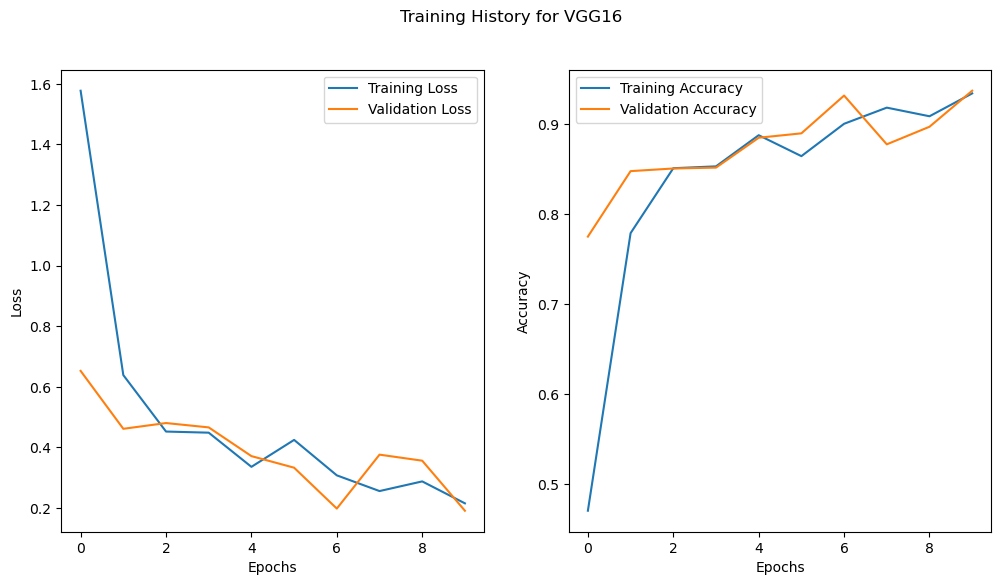


Training AlexNet...
Epoch 1/10 - Train Loss: 1.2306 - Train Acc: 0.5881 - Val Loss: 0.6617 - Val Acc: 0.7403
Epoch 2/10 - Train Loss: 0.6874 - Train Acc: 0.7740 - Val Loss: 1.1832 - Val Acc: 0.8557
Epoch 3/10 - Train Loss: 0.4575 - Train Acc: 0.8551 - Val Loss: 0.2977 - Val Acc: 0.9066
Epoch 4/10 - Train Loss: 0.3975 - Train Acc: 0.8795 - Val Loss: 0.3789 - Val Acc: 0.8738
Epoch 5/10 - Train Loss: 0.3907 - Train Acc: 0.8840 - Val Loss: 0.4387 - Val Acc: 0.8655
Epoch 6/10 - Train Loss: 0.3139 - Train Acc: 0.9127 - Val Loss: 0.2627 - Val Acc: 0.9301
Epoch 7/10 - Train Loss: 0.3270 - Train Acc: 0.9126 - Val Loss: 0.2175 - Val Acc: 0.9291
Epoch 8/10 - Train Loss: 0.3402 - Train Acc: 0.9096 - Val Loss: 0.2053 - Val Acc: 0.9389
Epoch 9/10 - Train Loss: 0.3743 - Train Acc: 0.8992 - Val Loss: 0.4734 - Val Acc: 0.8460
Epoch 10/10 - Train Loss: 0.2661 - Train Acc: 0.9202 - Val Loss: 0.2051 - Val Acc: 0.9423
Best Validation Accuracy for AlexNet: 0.9423
Evaluating AlexNet on test dataset...
Test 

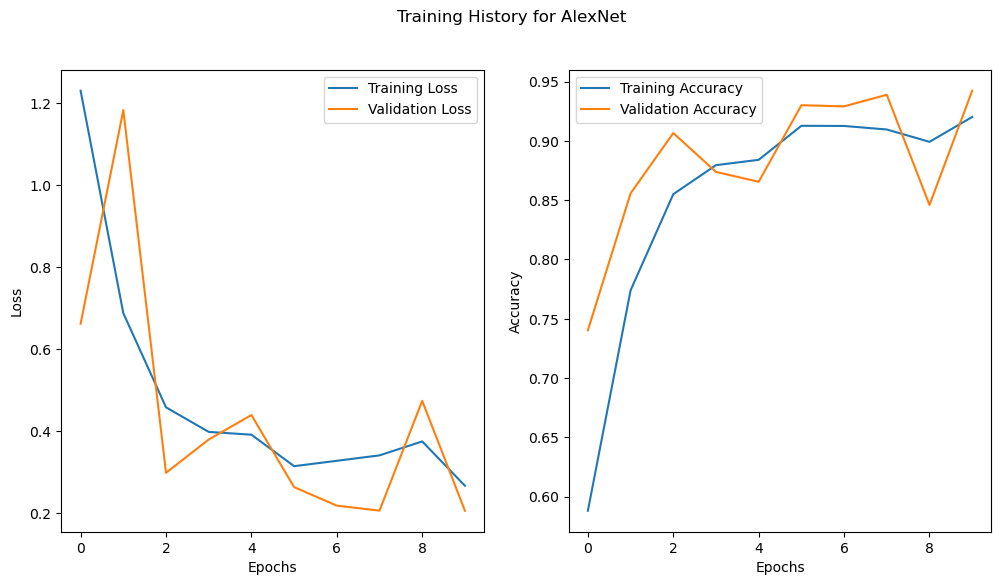


Training MobileNetV2...
Epoch 1/10 - Train Loss: 0.2422 - Train Acc: 0.9289 - Val Loss: 0.0488 - Val Acc: 0.9834
Epoch 2/10 - Train Loss: 0.1065 - Train Acc: 0.9657 - Val Loss: 0.0564 - Val Acc: 0.9804
Epoch 3/10 - Train Loss: 0.0873 - Train Acc: 0.9741 - Val Loss: 0.0288 - Val Acc: 0.9912
Epoch 4/10 - Train Loss: 0.1042 - Train Acc: 0.9689 - Val Loss: 0.0391 - Val Acc: 0.9892
Epoch 5/10 - Train Loss: 0.0541 - Train Acc: 0.9821 - Val Loss: 0.0879 - Val Acc: 0.9741
Epoch 6/10 - Train Loss: 0.0558 - Train Acc: 0.9829 - Val Loss: 0.0911 - Val Acc: 0.9765
Early stopping...
Best Validation Accuracy for MobileNetV2: 0.9912
Evaluating MobileNetV2 on test dataset...
Test Accuracy for MobileNetV2: 0.9741


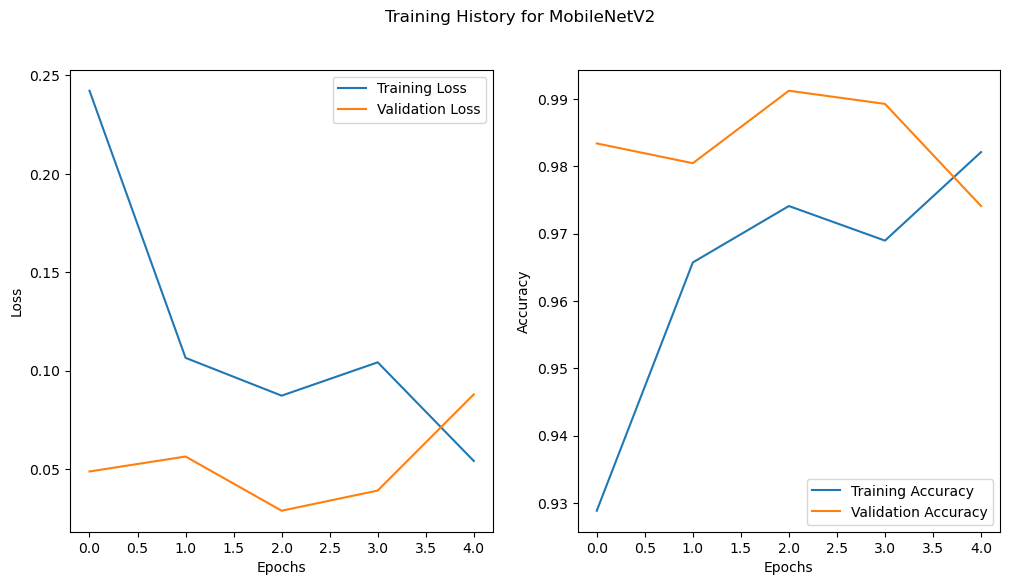

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
import numpy as np
import matplotlib.pyplot as plt

# Ensure test_loader is defined
# Example:
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define models for comparison
models_dict = {
    'ResNet18': models.resnet18(pretrained=True),
    'VGG16': models.vgg16(pretrained=True),
    'AlexNet': models.alexnet(pretrained=True),
    'MobileNetV2': models.mobilenet_v2(pretrained=True)
}

# Modify the fully connected layer to match the number of classes
num_classes = len(full_dataset.classes)

for model_name, model in models_dict.items():
    # Modify the final fully connected layer to match the number of classes
    if model_name == 'ResNet18':
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'VGG16':
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'AlexNet':
        num_ftrs = model.classifier[6].in_features
        model.classifier[6] = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'MobileNetV2':
        num_ftrs = model.classifier[1].in_features
        model.classifier[1] = nn.Linear(num_ftrs, num_classes)

    # Move the model to the GPU
    model = model.to(device)

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Early stopping parameters
    patience = 5  # Number of epochs to wait before stopping
    best_val_acc = 0.0
    epochs_no_improve = 0
    best_model_wts = model.state_dict()

    # Store training history
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    # Training loop for each model
    print(f"\nTraining {model_name}...")
    num_epochs = 10
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_preds = 0
        total_preds = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)

            # Calculate accuracy
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_acc = correct_preds.double() / total_preds

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        val_correct_preds = 0
        val_total_preds = 0

        with torch.no_grad():  # Turn off gradients for validation
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)

                # Calculate accuracy
                _, preds = torch.max(outputs, 1)
                val_correct_preds += torch.sum(preds == labels.data)
                val_total_preds += labels.size(0)

        val_loss = val_loss / len(val_loader.dataset)
        val_acc = val_correct_preds.double() / val_total_preds

        # Save the best model weights
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_model_wts = model.state_dict()
            epochs_no_improve = 0  # Reset early stopping counter
        else:
            epochs_no_improve += 1

        # Print the epoch statistics
        print(f"Epoch {epoch+1}/{num_epochs} - "
              f"Train Loss: {epoch_loss:.4f} - Train Acc: {epoch_acc:.4f} - "
              f"Val Loss: {val_loss:.4f} - Val Acc: {val_acc:.4f}")

        # Early stopping check
        if epochs_no_improve >= patience:
            print("Early stopping...")
            break

        # Save statistics for plotting
        history['train_loss'].append(epoch_loss)
        history['val_loss'].append(val_loss)
        history['train_acc'].append(epoch_acc.cpu().numpy())
        history['val_acc'].append(val_acc.cpu().numpy())

    # Load the best model weights
    model.load_state_dict(best_model_wts)

    # Evaluate the model on validation data
    print(f"Best Validation Accuracy for {model_name}: {best_val_acc:.4f}")

    # Save the training history to a file for this model
    np.save(f'{model_name}_training_history.npy', history)

    # Evaluate the model on test data
    print(f"Evaluating {model_name} on test dataset...")

    model.eval()  # Set the model to evaluation mode
    test_correct_preds = 0
    test_total_preds = 0

    with torch.no_grad():  # Turn off gradients for testing
        for inputs, labels in test_loader:  # Assuming `test_loader` is defined
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Calculate accuracy
            _, preds = torch.max(outputs, 1)
            test_correct_preds += torch.sum(preds == labels.data)
            test_total_preds += labels.size(0)

    # Calculate test accuracy
    test_acc = test_correct_preds.double() / test_total_preds
    print(f"Test Accuracy for {model_name}: {test_acc:.4f}")

    # Save test accuracy
    with open(f'{model_name}_test_accuracy.txt', 'w') as f:
        f.write(f"Test Accuracy: {test_acc:.4f}\n")

    # Plot training history
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.suptitle(f"Training History for {model_name}")
    plt.show()


In [11]:
!pip install transformers

In [12]:
from transformers import ViTForImageClassification, ViTFeatureExtractor
from transformers import Trainer, TrainingArguments

In [13]:
from tqdm import tqdm 

In [14]:
from collections import Counter
import torch
from torch.utils.data import DataLoader, random_split
from transformers import ViTForImageClassification, ViTFeatureExtractor
from tqdm import tqdm

# Define image transformations (rescale and normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViTs typically use 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load all images from the directory and split into training, validation, and test sets
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training, validation, and test
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

# Create data loader for validation and test
batch_size = 32
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained Vision Transformer model and feature extractor
model_name = "google/vit-base-patch16-224-in21k"  # Pretrained ViT model
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(full_dataset.classes))
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Evaluation mode
model.eval()

# Inference on validation set
correct_preds_val = 0
total_preds_val = 0
all_preds_val = []
all_labels_val = []

with torch.no_grad():
    for inputs, labels in tqdm(val_loader, desc="Validation Inference Progress"):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass (logits from ViT model)
        outputs = model(inputs).logits
        _, preds = torch.max(outputs, 1)

        # Count correct predictions
        correct_preds_val += torch.sum(preds == labels.data)
        total_preds_val += labels.size(0)

        all_preds_val.extend(preds.cpu().numpy())
        all_labels_val.extend(labels.cpu().numpy())

# Calculate validation accuracy
val_accuracy = correct_preds_val.double() / total_preds_val
print(f"Validation Accuracy for Pre-trained ViT: {val_accuracy:.4f}")

# Inference on test set
correct_preds_test = 0
total_preds_test = 0
all_preds_test = []
all_labels_test = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Test Inference Progress"):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass (logits from ViT model)
        outputs = model(inputs).logits
        _, preds = torch.max(outputs, 1)

        # Count correct predictions
        correct_preds_test += torch.sum(preds == labels.data)
        total_preds_test += labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = correct_preds_test.double() / total_preds_test
print(f"Test Accuracy for Pre-trained ViT: {test_accuracy:.4f}")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Leon\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
Validation Inference Progress: 100%|██████████| 64/64 [00:20<00:00,  3.16it/s]


Validation Accuracy for Pre-trained ViT: 0.0264


Test Inference Progress: 100%|██████████| 64/64 [00:20<00:00,  3.15it/s]

Test Accuracy for Pre-trained ViT: 0.0230


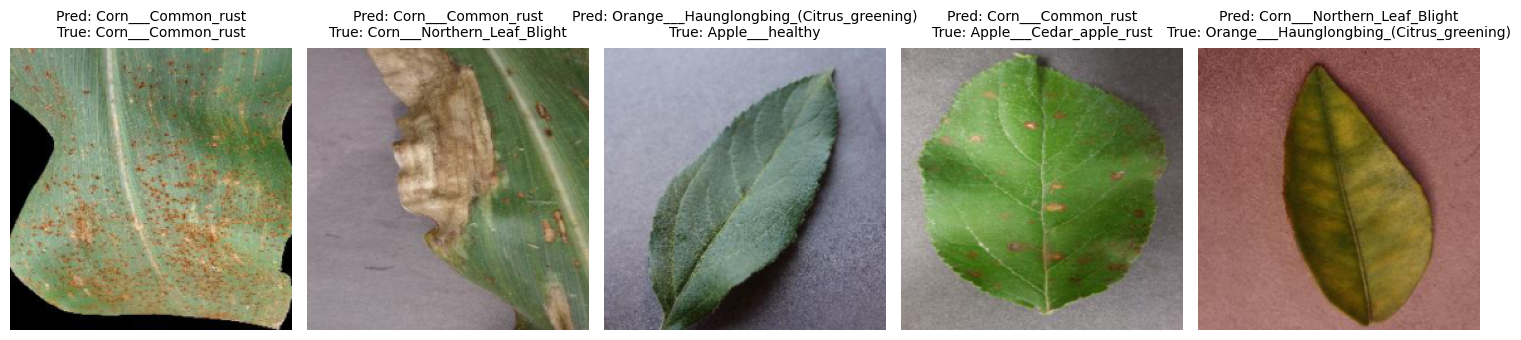

In [30]:
# Optionally, visualize some predictions
num_samples = 5  # Show 5 random samples
indices = np.random.choice(len(val_dataset), num_samples, replace=False)

fig, axes = plt.subplots(1, num_samples, figsize=(15, 5))
for i, idx in enumerate(indices):
    image, label = val_dataset[idx]
    ax = axes[i]
    
    # Convert tensor image to numpy array for display and denormalize it
    image = image.permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC format
    image = np.clip(image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)  # Denormalize
    
    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes
    
    # Show prediction vs. ground truth neatly
    pred_label = full_dataset.classes[all_preds[idx]]
    true_label = full_dataset.classes[label]
    
    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10, verticalalignment='bottom', horizontalalignment='center')

plt.tight_layout()  # To ensure there is no overlap in the layout
plt.show()

The **Validation Accuracy of 0.1454** for the pre-trained Vision Transformer (ViT) suggests that the model's performance is quite low, likely because it's using the weights trained on a general dataset (ImageNet) that might not be well-suited to our specific task (classifying plant diseases). The model has learned generic features that work for many common objects, but it hasn't been fine-tuned for your particular dataset.
**Pre-trained on ImageNet**:
   - The model was trained on **ImageNet**, which is a large-scale dataset with 1,000 classes representing a wide variety of natural objects. The weights from this pre-trained model capture general image features such as edges, textures, and simple shapes.
   - However, **plant disease images** might have very different visual characteristics compared to the types of images seen in ImageNet (e.g., natural objects like trees, etc.).

Fine-tuning ViT on our Dataset:

1. **Freeze Early Layers**

2. **Set a Lower Learning Rate**

3. **Train the Model**:

4. **Evaluation**:

### Fine-tuning Benefits:
- **Improved Performance**: Fine-tuning allows the model to specialize in detecting patterns relevant to your task (plant diseases), which should lead to better performance.
- **Lower Training Time**: Since the model already has pre-trained weights from ImageNet, fine-tuning is often much faster than training a model from scratch.
- **Efficient Use of Resources**: Fine-tuning leverages the knowledge learned from a large, general dataset, allowing the model to perform well on specialized tasks without requiring large amounts of data or computational resources.

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/20 - Loss: 2.6942, Accuracy: 0.3065
Validation Loss: 2.5632, Validation Accuracy: 0.4064
Epoch 2/20 - Loss: 2.4342, Accuracy: 0.4584
Validation Loss: 2.3255, Validation Accuracy: 0.4601
Epoch 3/20 - Loss: 2.2121, Accuracy: 0.4994
Validation Loss: 2.1236, Validation Accuracy: 0.4988
Epoch 4/20 - Loss: 2.0231, Accuracy: 0.5438
Validation Loss: 1.9512, Validation Accuracy: 0.5438
Epoch 5/20 - Loss: 1.8610, Accuracy: 0.5883
Validation Loss: 1.8025, Validation Accuracy: 0.5912
Epoch 6/20 - Loss: 1.7200, Accuracy: 0.6347
Validation Loss: 1.6719, Validation Accuracy: 0.6445
Epoch 7/20 - Loss: 1.5953, Accuracy: 0.6839
Validation Loss: 1.5551, Validation Accuracy: 0.6905
Epoch 8/20 - Loss: 1.4832, Accuracy: 0.7260
Validation Loss: 1.4496, Validation Accuracy: 0.7311
Epoch 9/20 - Loss: 1.3816, Accuracy: 0.7583
Validation Loss: 1.3534, Validation Accuracy: 0.7667
Epoch 10/20 - Loss: 1.2888, Accuracy: 0.7907
Validation Loss: 1.2653, Validation Accuracy: 0.7936
Epoch 11/20 - Loss: 1.2038, A

Test Inference Progress: 100%|██████████| 64/64 [00:21<00:00,  3.03it/s]


Test Accuracy for Pre-trained ViT: 0.9159


NameError: name 'all_preds' is not defined

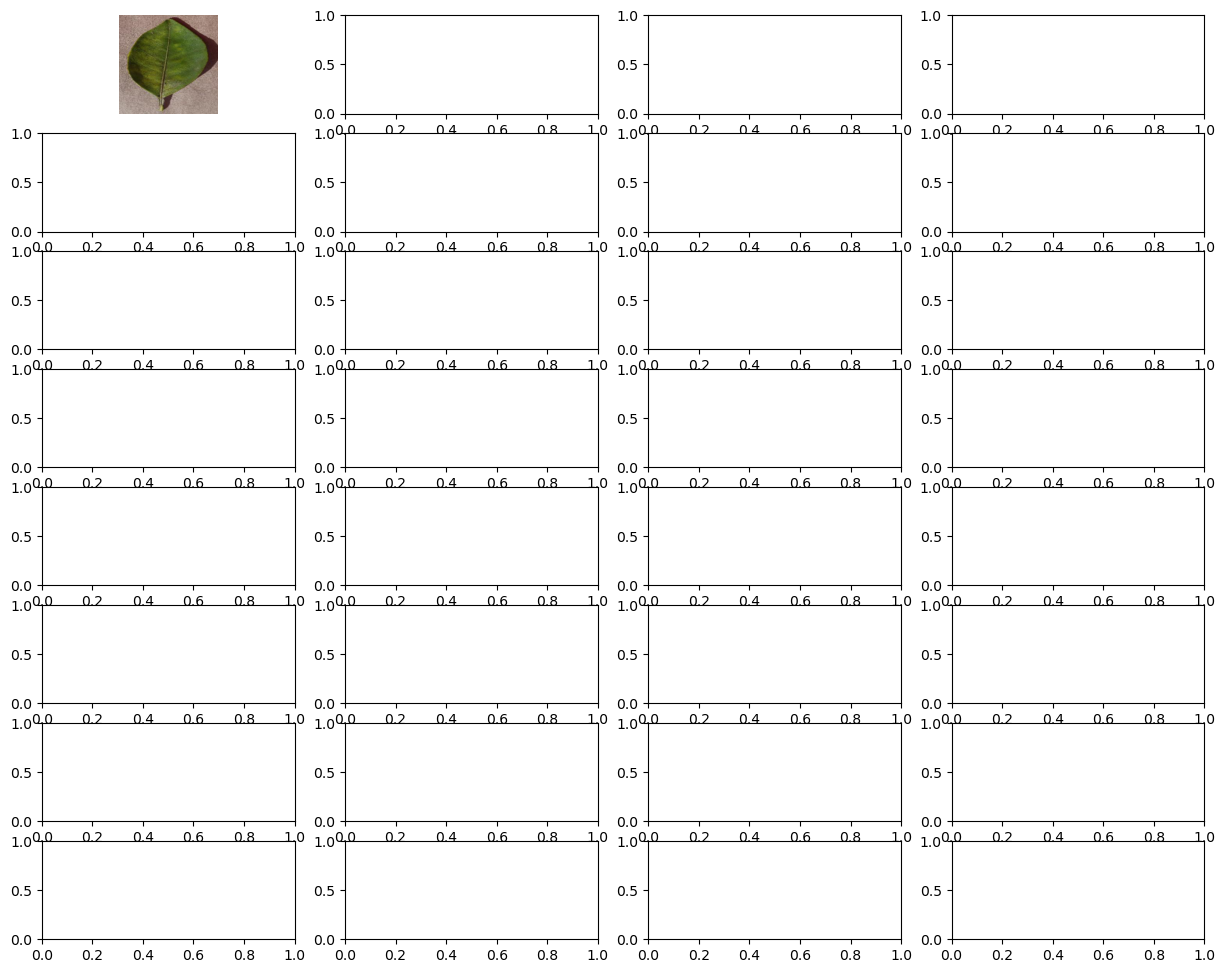

In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor, AdamW

# Define image transformations (rescale and normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ViTs typically use 224x224 input size
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
])

# Load all images from the directory and split into training, validation, and test sets
full_dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Split the dataset into training, validation, and test
train_size = int(0.8 * len(full_dataset))
val_size = int(0.1 * len(full_dataset))
test_size = len(full_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size, test_size])

# Create data loader for validation and test
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the pre-trained Vision Transformer model and feature extractor
model_name = "google/vit-base-patch16-224-in21k"  # Pretrained ViT model
model = ViTForImageClassification.from_pretrained(model_name, num_labels=len(full_dataset.classes))
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Freeze all layers except the final classification layer
for param in model.parameters():
    param.requires_grad = False

# Unfreeze the final classification layer
for param in model.classifier.parameters():
    param.requires_grad = True

# Move the model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)  # Lower learning rate
criterion = torch.nn.CrossEntropyLoss()

# Early stopping parameters
patience = 3  # Number of epochs to wait before stopping if no improvement
best_val_loss = float('inf')  # Initialize best validation loss to infinity
epochs_without_improvement = 0  # Counter for epochs without improvement

# Define the number of epochs
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_preds = 0
    total_preds = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct_preds += torch.sum(preds == labels.data)
        total_preds += labels.size(0)

    # Calculate training loss and accuracy for the current epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct_preds.double() / total_preds
    print(f"Epoch {epoch+1}/{num_epochs} - Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}")

    # Validate the model and calculate the validation loss
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct_preds = 0
    total_preds = 0
    with torch.no_grad():  # Disable gradient calculation during validation
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs).logits
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct_preds += torch.sum(preds == labels.data)
            total_preds += labels.size(0)

    # Calculate validation loss and accuracy
    val_loss = val_loss / len(val_loader.dataset)
    val_acc = correct_preds.double() / total_preds
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:  # If validation loss improved
        best_val_loss = val_loss
        epochs_without_improvement = 0  # Reset counter if improvement found
    else:
        epochs_without_improvement += 1  # Increment counter if no improvement

    if epochs_without_improvement >= patience:  # If no improvement for 'patience' epochs, stop training
        print(f"Early stopping triggered. No improvement for {patience} epochs.")
        break

# Inference on test set
correct_preds_test = 0
total_preds_test = 0
all_preds_test = []
all_labels_test = []

with torch.no_grad():
    for inputs, labels in tqdm(test_loader, desc="Test Inference Progress"):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass (logits from ViT model)
        outputs = model(inputs).logits
        _, preds = torch.max(outputs, 1)

        # Count correct predictions
        correct_preds_test += torch.sum(preds == labels.data)
        total_preds_test += labels.size(0)

        all_preds_test.extend(preds.cpu().numpy())
        all_labels_test.extend(labels.cpu().numpy())

# Calculate test accuracy
test_accuracy = correct_preds_test.double() / total_preds_test
print(f"Test Accuracy for Pre-trained ViT: {test_accuracy:.4f}")

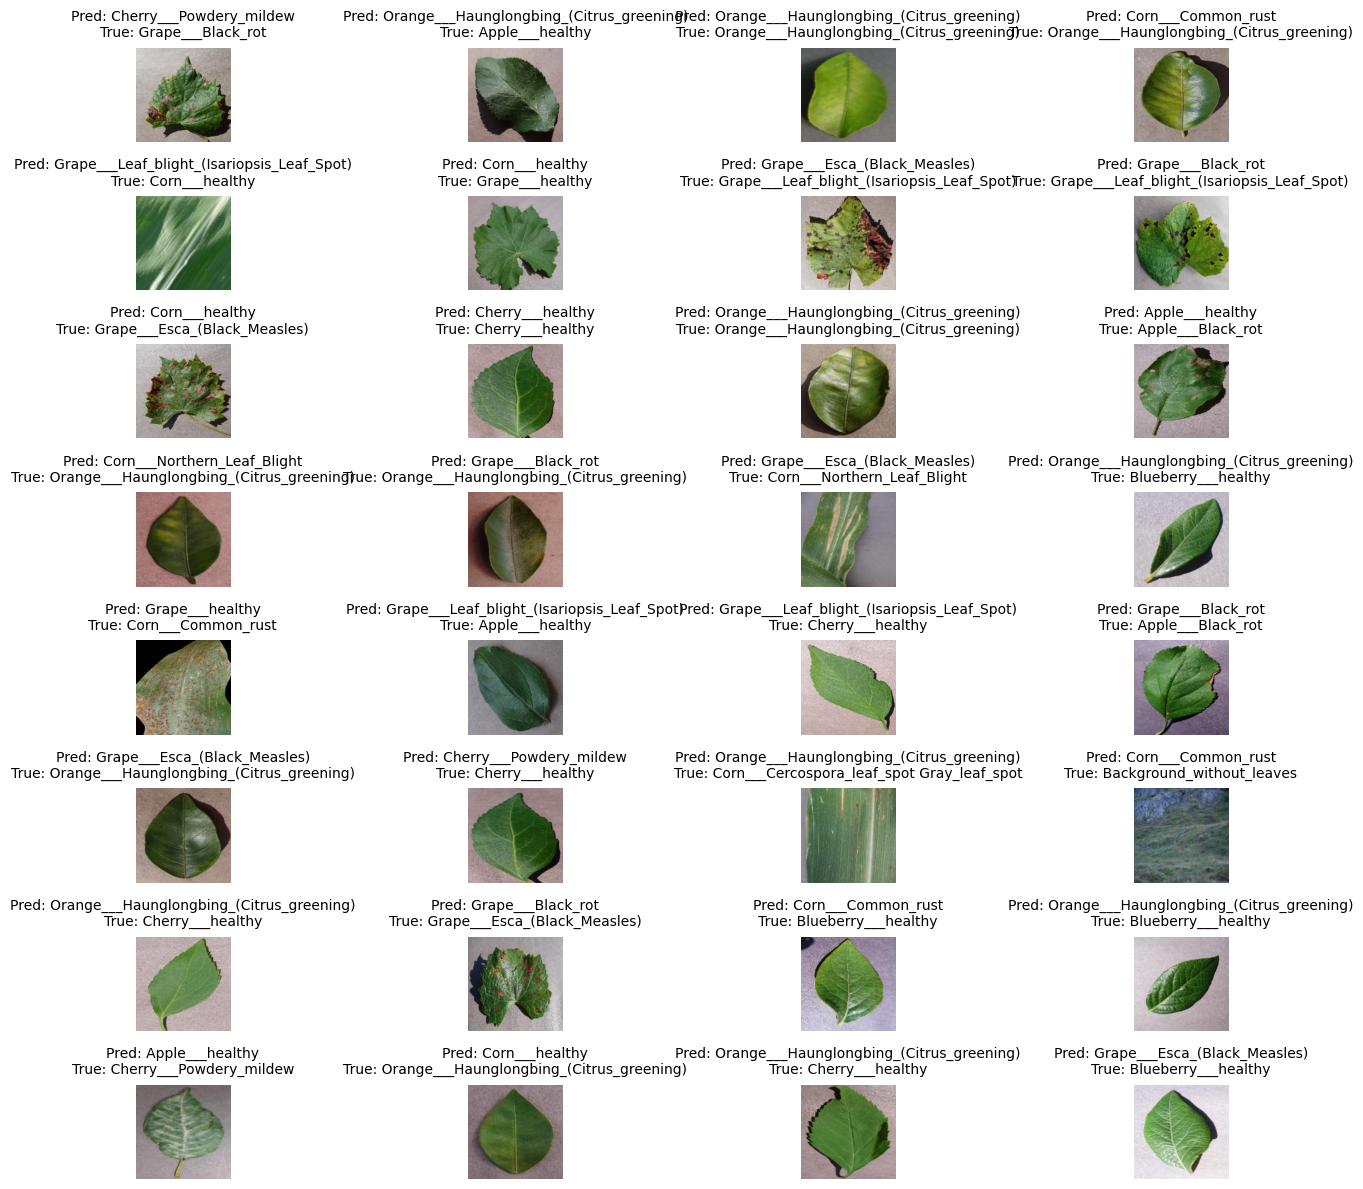

In [18]:
# Display validation predictions
num_samples = 32  # Show 12 random samples
indices = np.random.choice(len(val_dataset), num_samples, replace=False)

# Set number of rows and columns for a grid layout (e.g., 3 rows, 4 columns)
num_rows = 8
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for i, idx in enumerate(indices):
    image, label = val_dataset[idx]
    ax = axes[i]

    # Convert tensor image to numpy array for display and denormalize it
    image = image.permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC format
    image = np.clip(image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406]), 0, 1)  # Denormalize

    ax.imshow(image)  # Display image
    ax.axis('off')  # Hide axes

    # Show prediction vs. ground truth neatly
    pred_label = full_dataset.classes[all_preds_test[idx]]
    true_label = full_dataset.classes[label]

    ax.set_title(f"Pred: {pred_label}\nTrue: {true_label}", fontsize=10, verticalalignment='bottom', horizontalalignment='center')

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()  # To ensure there is no overlap in the layout
plt.show()